In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# if using a jupyter notebook
%matplotlib inline

In [2]:
# codilime colors

def rgb_to_hex(r, g, b):
    return '#{:02x}{:02x}{:02x}'.format(r, g, b)

lime = rgb_to_hex(163, 237, 0)
lagoon_main = rgb_to_hex(0, 131, 148)
turquoise_main = rgb_to_hex(68, 220, 236)
glacial_main = rgb_to_hex(76, 189, 250)
mint_main = rgb_to_hex(0, 218, 156)

In [3]:
# provide application logs to make memory consumption chart
logs="""2023-10-02 20:52:54, Allocated 10% of 1000 MB, (in memory array) 100 MB, (in process) 100 MB for 5 sec
2023-10-02 20:52:59, Allocated 30% of 1000 MB, (in memory array) 300 MB, (in process) 300 MB for 5 sec
2023-10-02 20:53:04, Allocated 80% of 1000 MB, (in memory array) 800 MB, (in process) 800 MB for 5 sec
2023-10-02 20:53:09, Allocated 99% of 1000 MB, (in memory array) 990 MB, (in process) 990 MB for 5 sec
2023-10-02 20:53:14, Allocated 100% of 1000 MB, (in memory array) 1000 MB, (in process) 1000 MB for 5 sec
2023-10-02 20:53:19, Allocated 100% of 1000 MB, (in memory array) 1000 MB, (in process) 1000 MB for 5 sec
2023-10-02 20:53:24, Allocated 90% of 1000 MB, (in memory array) 900 MB, (in process) 900 MB for 5 sec
2023-10-02 20:53:29, Allocated 72% of 1000 MB, (in memory array) 720 MB, (in process) 720 MB for 5 sec
2023-10-02 20:53:34, Allocated 50% of 1000 MB, (in memory array) 500 MB, (in process) 500 MB for 5 sec
2023-10-02 20:53:39, Allocated 41% of 1000 MB, (in memory array) 410 MB, (in process) 410 MB for 5 sec
2023-10-02 20:53:44, Allocated 28% of 1000 MB, (in memory array) 280 MB, (in process) 280 MB for 5 sec
2023-10-02 20:53:50, Allocated 13% of 1000 MB, (in memory array) 130 MB, (in process) 130 MB for 5 sec
2023-10-02 20:53:55, Allocated 10% of 1000 MB, (in memory array) 100 MB, (in process) 100 MB for 5 sec
2023-10-02 20:54:00, Allocated 30% of 1000 MB, (in memory array) 300 MB, (in process) 300 MB for 5 sec
2023-10-02 20:54:05, Allocated 80% of 1000 MB, (in memory array) 800 MB, (in process) 800 MB for 5 sec
2023-10-02 20:54:10, Allocated 99% of 1000 MB, (in memory array) 990 MB, (in process) 990 MB for 5 sec
2023-10-02 20:54:15, Allocated 99% of 1000 MB, (in memory array) 990 MB, (in process) 990 MB for 5 sec
2023-10-02 20:54:20, Allocated 100% of 1000 MB, (in memory array) 1000 MB, (in process) 1000 MB for 5 sec
2023-10-02 20:54:25, Allocated 85% of 1000 MB, (in memory array) 850 MB, (in process) 860 MB for 5 sec
2023-10-02 20:54:30, Allocated 65% of 1000 MB, (in memory array) 650 MB, (in process) 660 MB for 5 sec
2023-10-02 20:54:35, Allocated 47% of 1000 MB, (in memory array) 470 MB, (in process) 480 MB for 5 sec
2023-10-02 20:54:40, Allocated 40% of 1000 MB, (in memory array) 400 MB, (in process) 400 MB for 5 sec
2023-10-02 20:54:45, Allocated 25% of 1000 MB, (in memory array) 250 MB, (in process) 260 MB for 5 sec
2023-10-02 20:54:50, Allocated 10% of 1000 MB, (in memory array) 100 MB, (in process) 100 MB for 5 sec
2023-10-02 20:54:55, Allocated 12% of 1000 MB, (in memory array) 120 MB, (in process) 120 MB for 5 sec
"""

In [4]:
# prepare dataframe from logs data
import re
regex = r"^(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}).*\(in process\) (\d+).*$"

datetime_idx = []
mem_allocation = []
for line in logs.splitlines():
    matches = re.findall(regex, line)
    d_t = datetime.strptime(matches[0][0], "%Y-%m-%d %H:%M:%S")
    mem_alloc = int(matches[0][1])
    datetime_idx.append(d_t)
    mem_allocation.append(mem_alloc)
    # print(d_t, mem_alloc)
alloc_df = pd.DataFrame(mem_allocation, columns=['mem_alloc'])
alloc_df.set_index(pd.DatetimeIndex(datetime_idx), inplace=True)
display(alloc_df)

,mem_alloc
2023-10-02 20:52:54,100
2023-10-02 20:52:59,300
2023-10-02 20:53:04,800
2023-10-02 20:53:09,990
2023-10-02 20:53:14,1000
2023-10-02 20:53:19,1000
2023-10-02 20:53:24,900
2023-10-02 20:53:29,720
2023-10-02 20:53:34,500
2023-10-02 20:53:39,410


<Axes: title={'center': 'Memory allocation in time'}, xlabel='Time', ylabel='Allocated memory [MB]'>

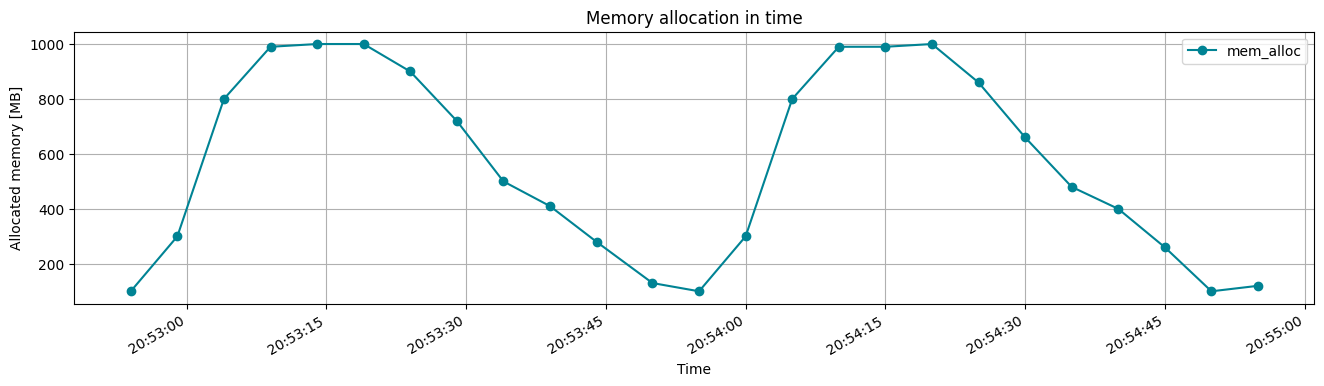

In [5]:
# plt.figure()
myFmt = mdates.DateFormatter('%H:%M:%S') # here you can format your datetick labels as desired
fig, axs = plt.subplots(figsize=(16, 4))
axs.xaxis.set_major_formatter(myFmt)
alloc_df.plot(ax=axs, grid=True, xlabel="Time", ylabel='Allocated memory [MB]', title="Memory allocation in time", color=[lagoon_main], marker='o')